In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df_main = pd.read_csv('./train.csv')
df_main

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Problem 1 : Predicting SalePrice using GrLivArea

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

In [3]:
class UnivariateModel:
    model_data = {}
    
    def __init__(self, feature, label, clean_data=False):
        self.feature = feature
        self.label = label
        self.train_model(clean_data=clean_data)
        
    def train_model(self, clean_data=False):
        df_train = df_main[[self.feature, self.label]]
            
        if clean_data:
            for col in (self.feature, self.label):
                q1, q3 = df_train[col].quantile([0.25, 0.75])
                iqr = q3 - q1
                df_train = df_train.drop(
                    df_train[(df_train[col] < q1-1.5*iqr) | (df_train[col] > q3+1.5*iqr)].index)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            df_train[self.feature], df_train[self.label], test_size=0.2)

        self.X_train = self.X_train.to_numpy().reshape(-1,1)
        self.X_test = self.X_test.to_numpy().reshape(-1,1)

        self.linreg = LinearRegression()
        self.linreg.fit(self.X_train, self.y_train)
        
        self.y_train_pred = self.linreg.predict(self.X_train)
        self.y_test_pred = self.linreg.predict(self.X_test)

    def print_coefficients(self):
        print(f"Intercept of Regression \t: b = {self.linreg.intercept_}")
        print(f"Coefficients of Regression \t: a = {self.linreg.coef_}")
        
    def print_regression_lines(self):
        f, axes = plt.subplots(1, 2, figsize=(24, 12))
        axes[0].scatter(self.X_train, self.y_train, color="blue", s=15)
        axes[0].scatter(self.X_train, self.y_train_pred, color="red", s=15)
        axes[1].scatter(self.X_test, self.y_test, color="blue", s=15)
        axes[1].scatter(self.X_test, self.y_test_pred, color="red", s=15)
        for ax in axes:
            ax.set_xlabel(self.feature)
            ax.set_ylabel(self.label)
        axes[0].title.set_text("Linear Regression Line for Train Dataset")
        axes[1].title.set_text("Linear Regression Line for Test Dataset")
        axes[0].grid()
        axes[1].grid()
        plt.show()
        
    def show_goodness_fits(self):
        print("Goodness of Fit of Model (Train Dataset)")
        print(f"Explained Variance (R^2) \t: {self.linreg.score(self.X_train, self.y_train)}")
        # print(f"Mean Squared Error (MSE) \t: {mean_squared_error(y_train, y_train_pred)}")
        print()

        print("Goodness of Fit of Model (Test Dataset)")
        # print(f"Explained Variance (R^2) \t: {linreg.score(X_test, y_test)}")
        print(f"Mean Squared Error (MSE) \t: {mean_squared_error(self.y_test, self.y_test_pred)}")
        
        f, axes = plt.subplots(1, 2, figsize=(24, 12))

        axes[0].scatter(self.y_train, self.y_train_pred, color="blue", s=15)
        axes[0].plot(self.y_train, self.y_train, 'r-', linewidth=1)
        axes[0].set_xlabel(f"True Values of {self.label} (Train)")
        axes[0].set_ylabel(f"Predicted Values of {self.label} (Train)")
        axes[0].title.set_text("Predicted against True Values for Test Dataset")
        axes[1].scatter(self.y_test, self.y_test_pred, color = "red", s=15)
        axes[1].plot(self.y_test, self.y_test, 'b-', linewidth=1)
        axes[1].set_xlabel(f"True Values of {self.label} (Train)")
        axes[1].set_ylabel(f"Predicted Values of {self.label} (Test)")
        axes[1].title.set_text("Predicted against True Values for Test Dataset")

        axes[0].grid()
        axes[1].grid()
        plt.show()

In [4]:
model_GrLivArea = UnivariateModel('GrLivArea', 'SalePrice')
model_GrLivArea.print_coefficients()

Intercept of Regression 	: b = 17011.805609100935
Coefficients of Regression 	: a = [108.06687223]


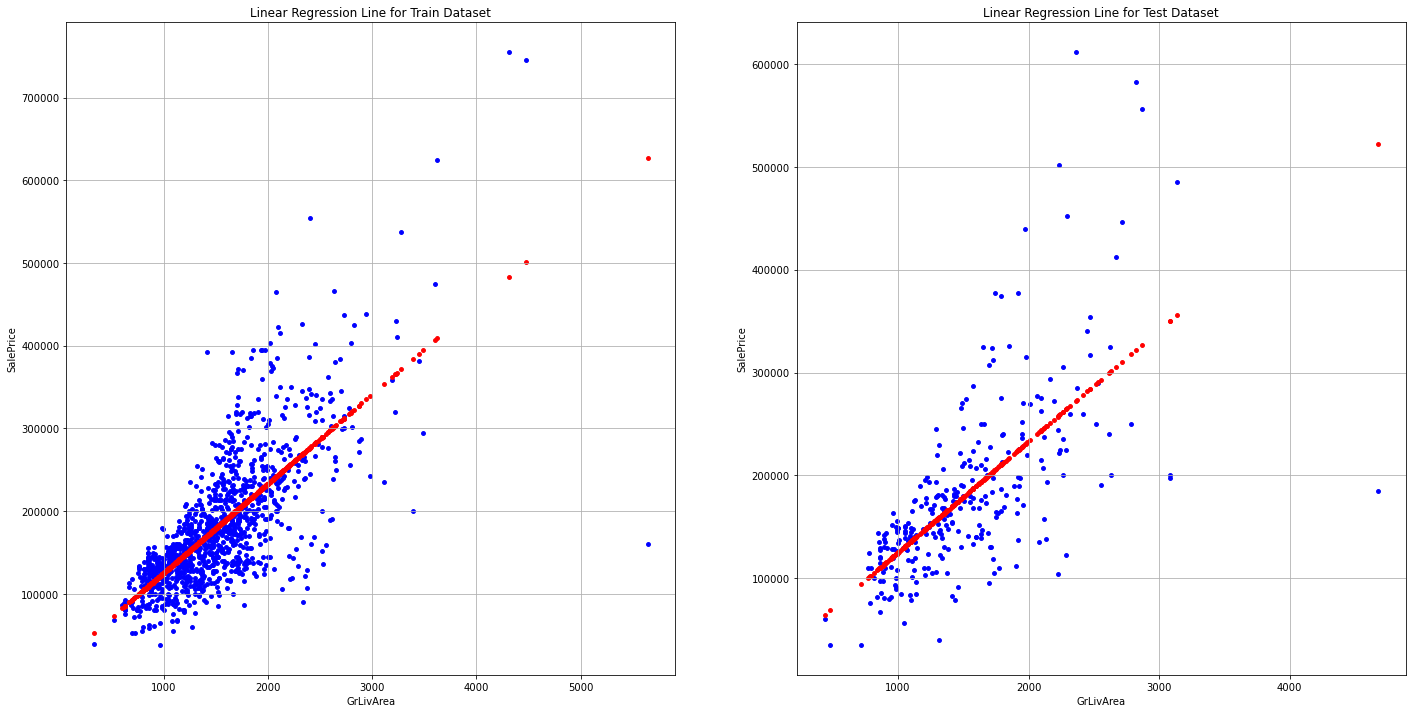

In [5]:
model_GrLivArea.print_regression_lines()

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

Goodness of Fit of Model (Train Dataset)
Explained Variance (R^2) 	: 0.5246714760181364

Goodness of Fit of Model (Test Dataset)
Mean Squared Error (MSE) 	: 4142267175.060962


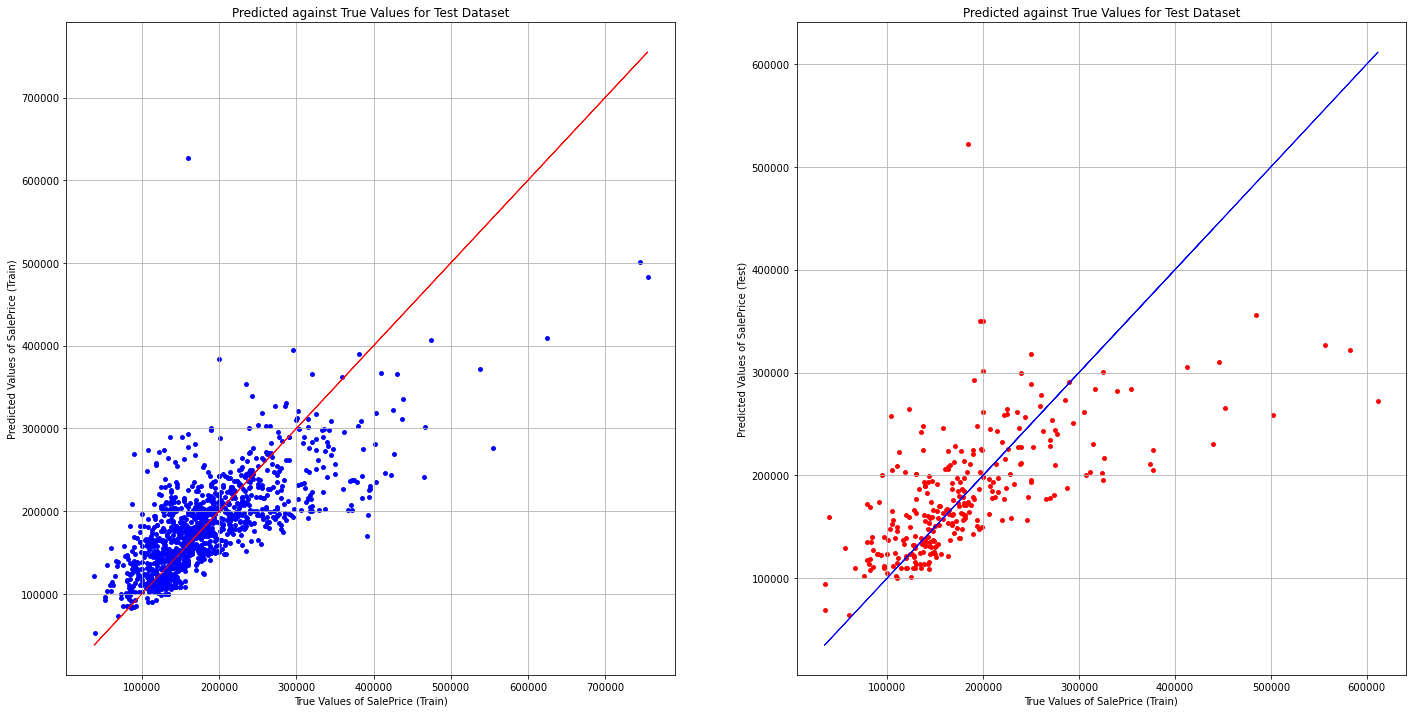

In [6]:
model_GrLivArea.show_goodness_fits()

## Problem 2 : Predicting SalePrice using Other Variables

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

<b>TotalBsmtSF</b>
<br/>
<i>Include TotalBsmtSF = 0</i>

In [7]:
model_TotalBsmtSF = UnivariateModel('TotalBsmtSF', 'SalePrice')
model_TotalBsmtSF.print_coefficients()

Intercept of Regression 	: b = 70186.21590082673
Coefficients of Regression 	: a = [103.10956107]


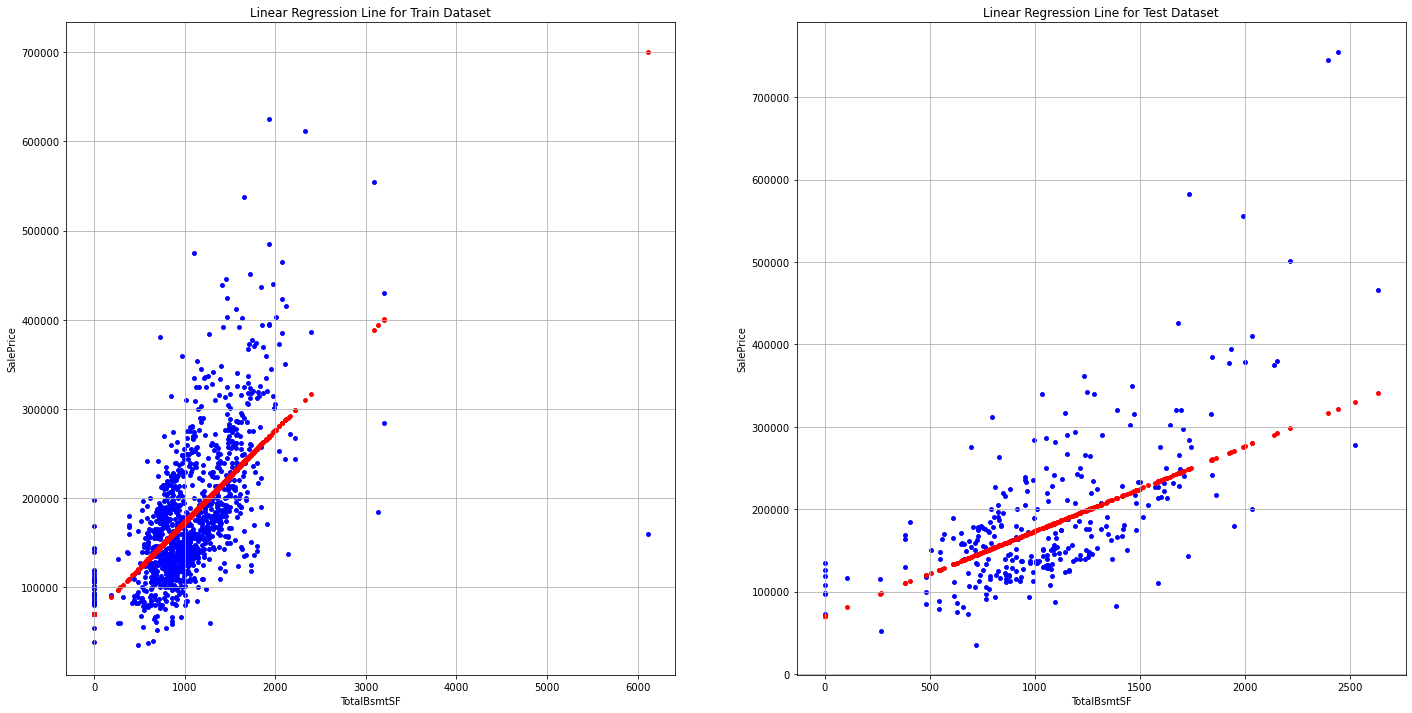

In [8]:
model_TotalBsmtSF.print_regression_lines()

Goodness of Fit of Model (Train Dataset)
Explained Variance (R^2) 	: 0.35730182232922003

Goodness of Fit of Model (Test Dataset)
Mean Squared Error (MSE) 	: 5082088635.2898


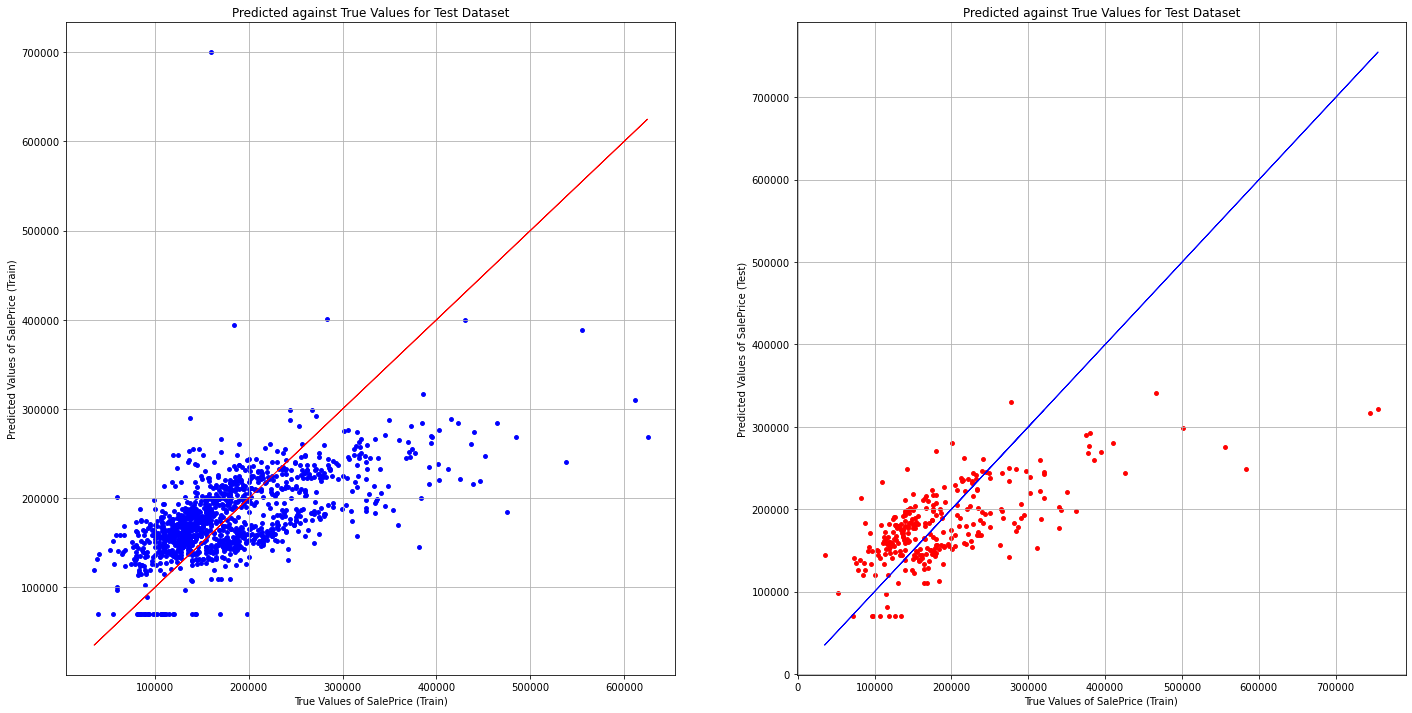

In [9]:
model_TotalBsmtSF.show_goodness_fits()

In [10]:
model_GarageArea = UnivariateModel('GarageArea', 'SalePrice')
model_GarageArea.print_coefficients()

Intercept of Regression 	: b = 70780.53267074848
Coefficients of Regression 	: a = [231.54545277]


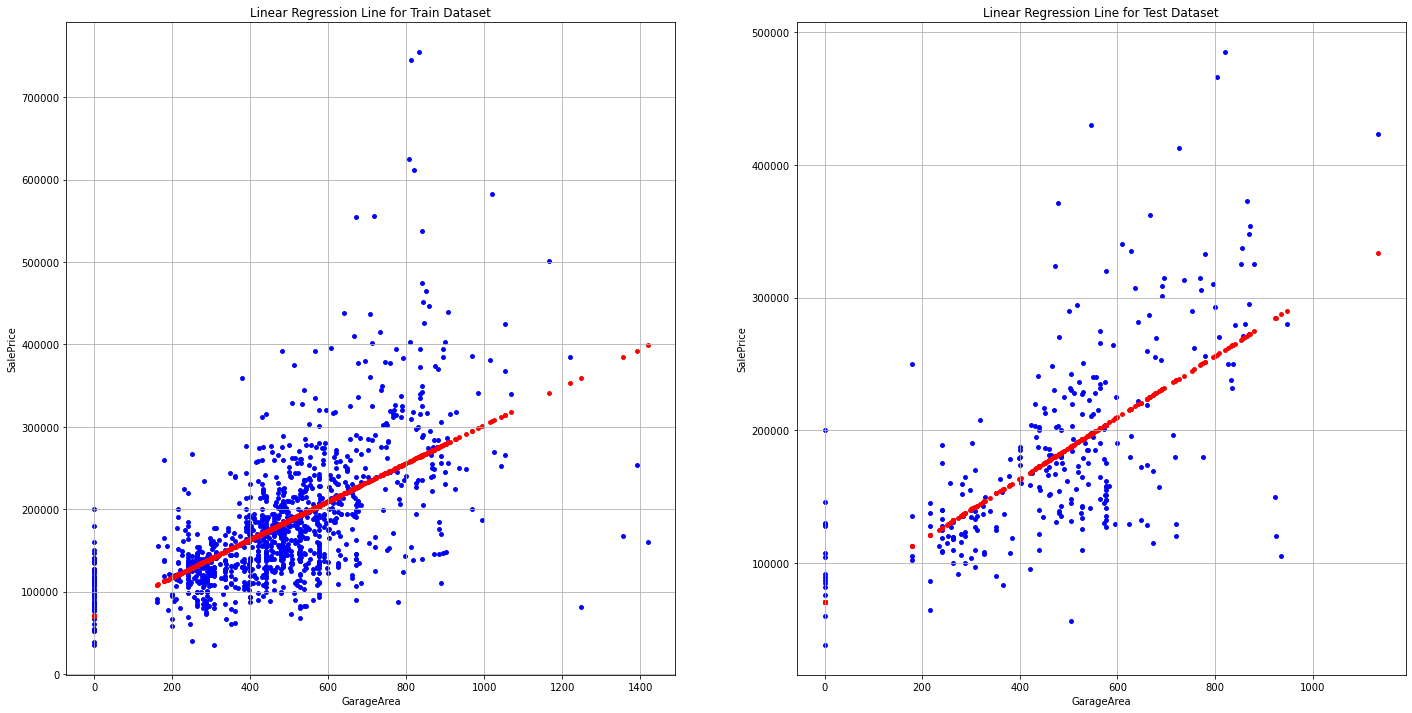

In [11]:
model_GarageArea.print_regression_lines()

<b>GarageArea</b>
<br/>
<i>Include GarageArea = 0</i>

Goodness of Fit of Model (Train Dataset)
Explained Variance (R^2) 	: 0.3815703763035969

Goodness of Fit of Model (Test Dataset)
Mean Squared Error (MSE) 	: 3177667214.6440263


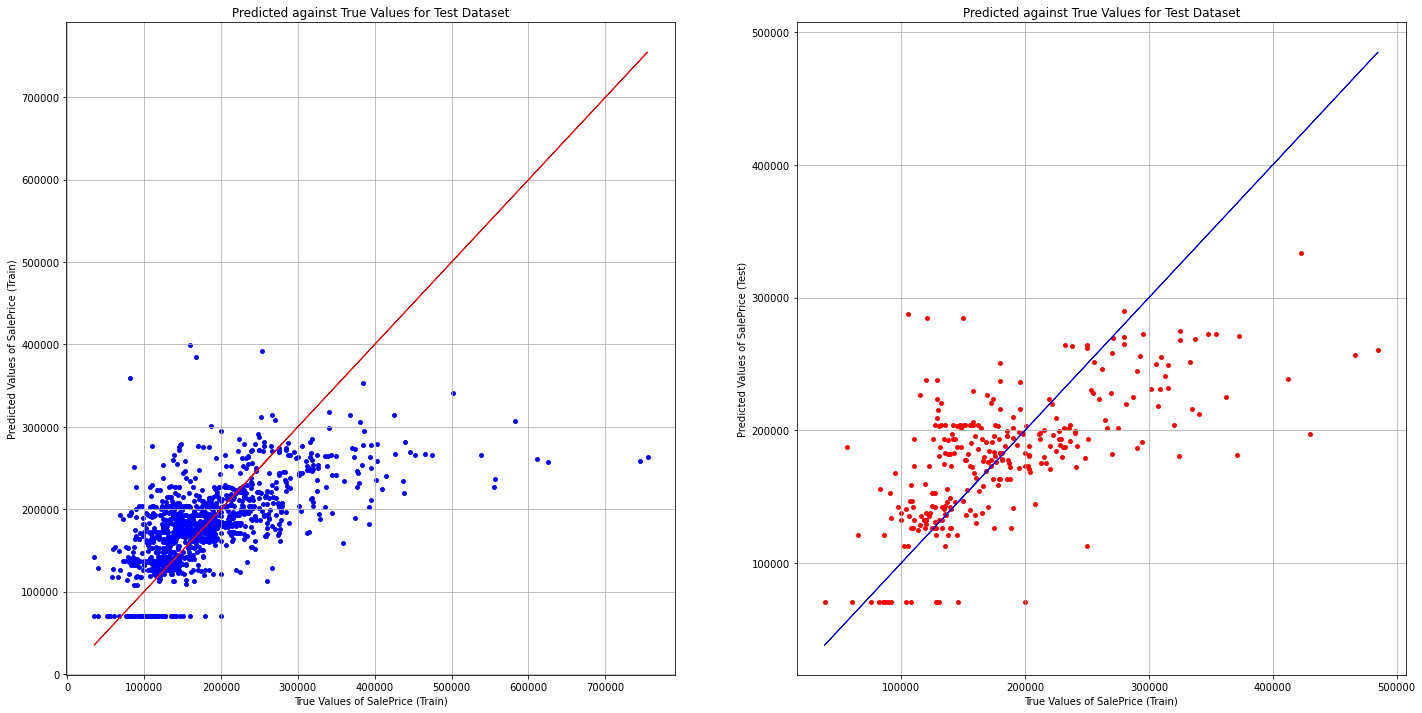

In [12]:
model_GarageArea.show_goodness_fits()

<b>Conclusion</b>
<br/>
GrLivArea is the best as it has the highest R<sup>2</sup> (best fit) and lowest MSE values (least errors).

## Problem 3 : Refining the Models to Predict SalePrice

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

In [13]:
model_GrLivArea_clean = UnivariateModel('GrLivArea', 'SalePrice', clean_data=True)

(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

In [14]:
model_GrLivArea_clean.print_coefficients()

Intercept of Regression 	: b = 37316.82565857904
Coefficients of Regression 	: a = [90.79701053]


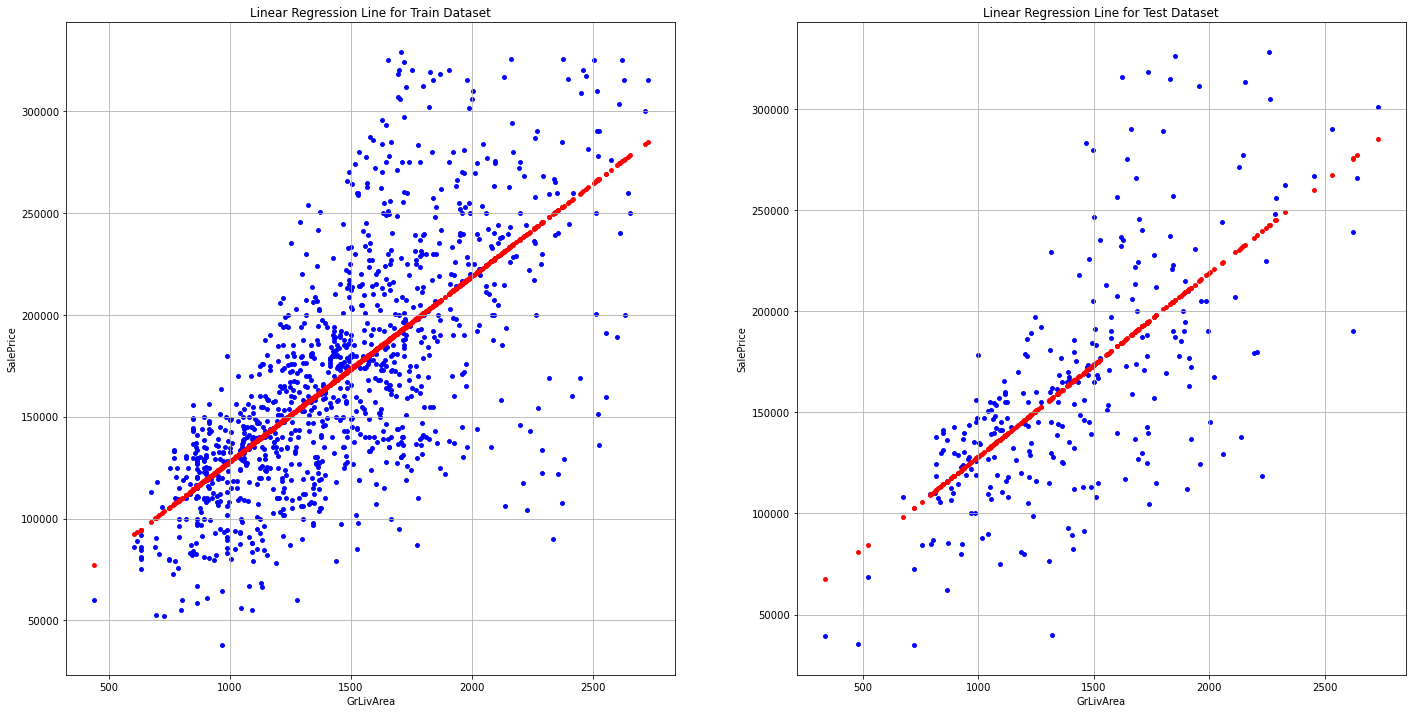

In [15]:
model_GrLivArea_clean.print_regression_lines()

(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

Goodness of Fit of Model (Train Dataset)
Explained Variance (R^2) 	: 0.46460549872365275

Goodness of Fit of Model (Test Dataset)
Mean Squared Error (MSE) 	: 1756598434.0818412


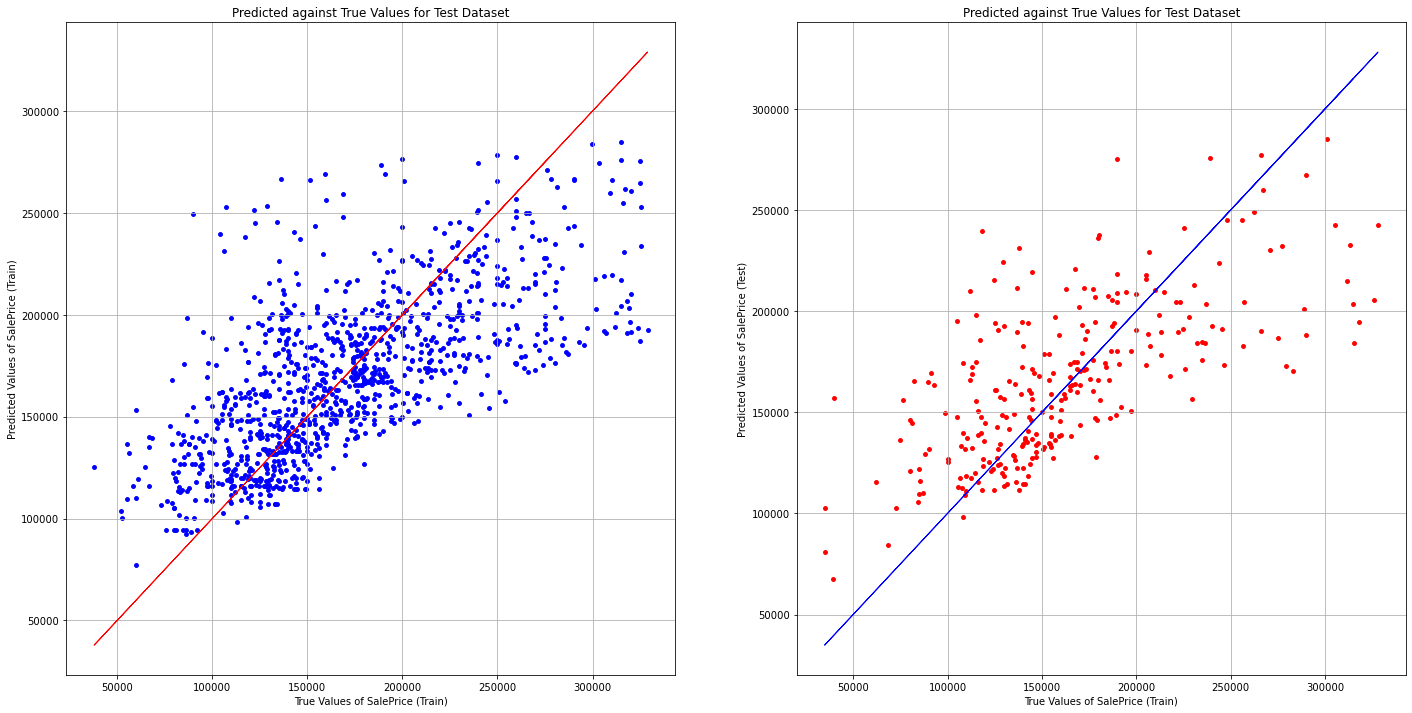

In [16]:
model_GrLivArea_clean.show_goodness_fits()

<b>Conclusion</b>
<br/>
The cleaned dataset is better as it has approximately the same R<sup>2</sup> (best fit) but lower MSE values (fewer errors).